In [67]:
import pandas as pd
import seaborn as sns
import xarray as xr
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [68]:
ds = xr.open_dataset(r"C:\Users\ioloi\Downloads/ERSST_V5_mon_185401-202106.nc")
# select period
ds = ds.sel(time=slice('1900', '2020'))

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1452, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-07-07

In [69]:
ds_EP = ds.sel(lat=slice(5, -5), lon=slice(190, 240))
ds_EP_mean = ds_EP.mean(dim=('lon', 'lat'))
ds_EP_mean

<xarray.Dataset>
Dimensions:    (time: 1452, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time) float32 27.74 27.89 28.18 28.46 ... 25.46 25.28 25.45

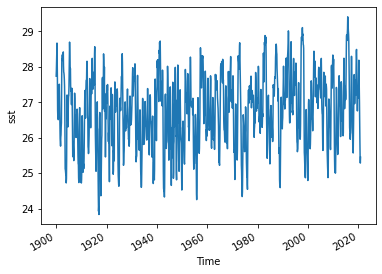

In [70]:
ds_EP_mean['sst'].plot()

Text(0.5, 0, 'Years')

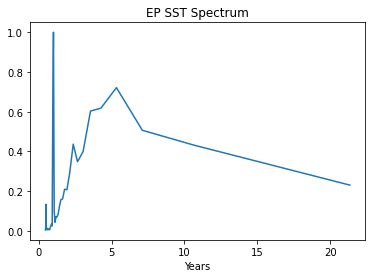

In [71]:
#n        = 150 
#alpha    = 0.5 
#noverlap = 75 
#nfft     = 256 #default value 
#fs       = 1   #default value 
#win      = signal.tukey(n, alpha)

f1, pxx1  = signal.welch(ds_EP_mean['sst'])
#f1, pxx1  = signal.welch(ds_EP_mean['sst'], nfft=nfft, fs=fs, window=win, noverlap=noverlap)

# process frequencies and psd
pxx1 = pxx1/np.max(pxx1) # noralize the psd values          
plt.plot(1.0/f1[1:47]/12, pxx1[1:47], label='welch')
plt.title('EP SST Spectrum');
plt.xlabel('Years') 